In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Desktop/Loan payments data.csv')

In [121]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [122]:
print(df.info())
print('-------------')
print(df.shape)
print('The total rows are ',df.shape[0],' and the total features are ',df.shape[1]-1)
print('The predictor variable is loan status, divided into 3 cateogories as ',df['loan_status'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB
None
-------------
(500, 11)
The total rows are  500  and the total features are  10
The predictor variable is loan status, divided into 3 cateogories as  ['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']


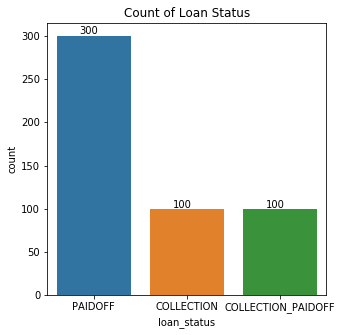

In [215]:
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(df['loan_status'])
ax.set_title("Count of Loan Status")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()*1.01))

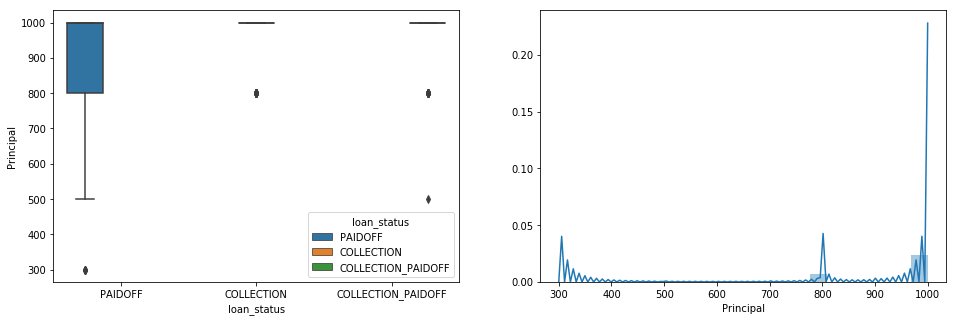

In [213]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(x="loan_status", y="Principal", data=df, hue="loan_status", ax=axs[0])
sns.distplot(df['Principal'], ax=axs[1])

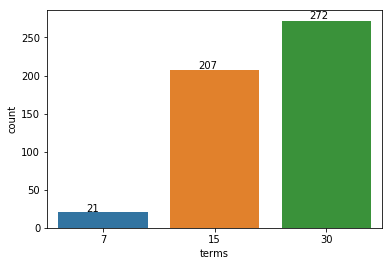

In [173]:
ax = sns.countplot(df['terms'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()*1.01))

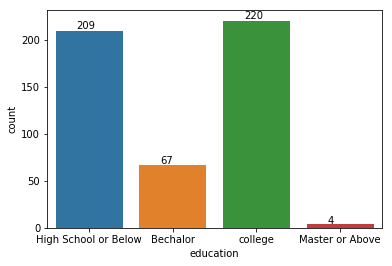

In [178]:
ax = sns.countplot(df['education'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()*1.01))

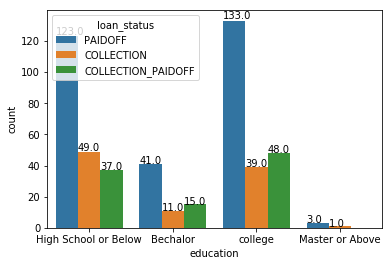

In [181]:
ax = sns.countplot(df['education'],hue='loan_status',data=df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()*1.01))

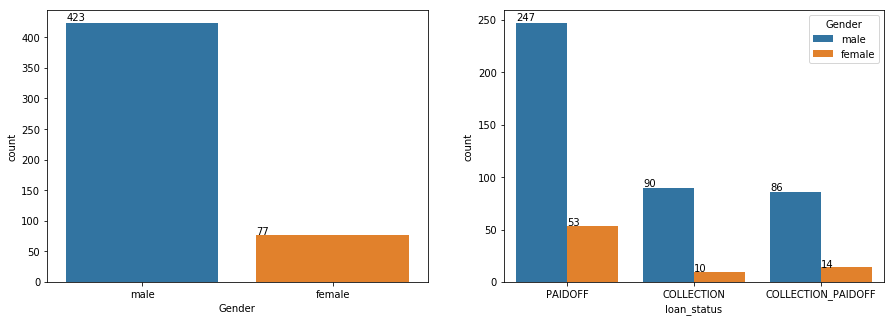

In [201]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

ax = sns.countplot(x='Gender',data=df, ax=axs[0])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()*1.01)) 

ax = sns.countplot(x='loan_status', hue='Gender', data=df, ax=axs[1])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()*1.01))

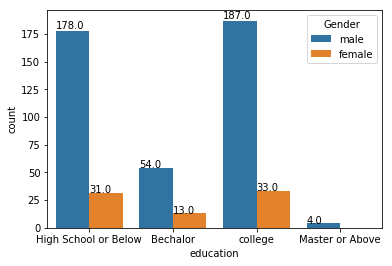

In [203]:
ax = sns.countplot(df['education'],hue='Gender',data=df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()*1.01))

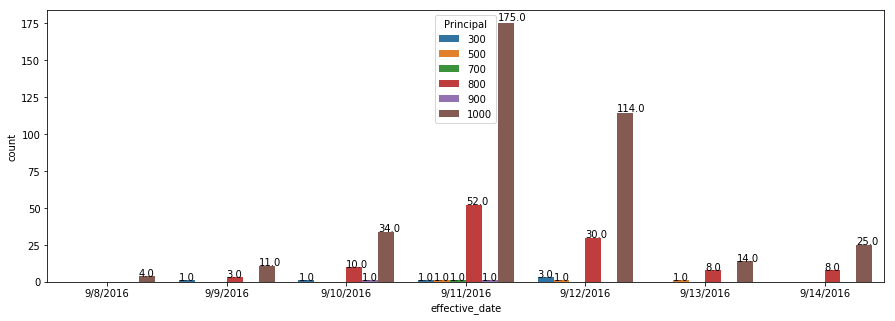

In [255]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(df['effective_date'],hue=df['Principal'],data=df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()*1.01))

> The loan data is for Sept 8th to 14th. With most of the loans originating/drawn on Sept 11. Sep 10,11 and 12 make for the bulk of the business for the week. 400+ loans out of a total of 500 for the week.

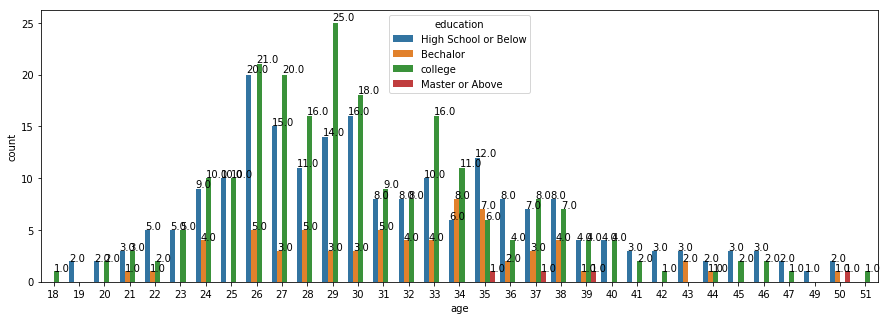

In [232]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(df['age'],hue=df['education'],data=df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()*1.01))

>Interesting insights, the preference for universities was more among the older population and the younger demographics seem to prefer Colleges POTENTIAL REASON: Might still be pursuing/Rising tuition cost in last few years. 4 instances of masters also seen in older demographics.

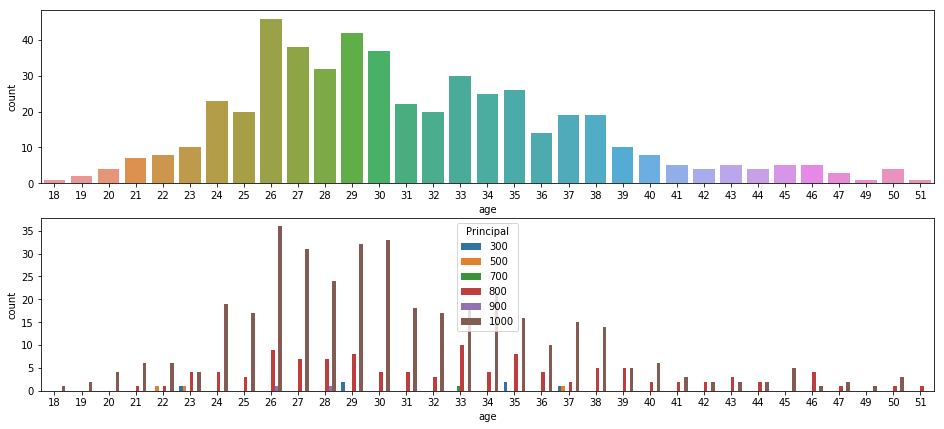

In [305]:
fig, axs = plt.subplots(2, 1, figsize=(16, 7)) 

ax = sns.countplot(df['age'],ax=axs[0])
ax = sns.countplot(df['age'],hue=df['Principal'],data=df,ax =axs[1])

>The need for payday(bullet loans) seems to peak till 30 and then reduces as people tend to become financially stable.
The probablity for credit and the amount required both seem to trend. Ages 24-38 tend to get loan of $$800 - $1000.

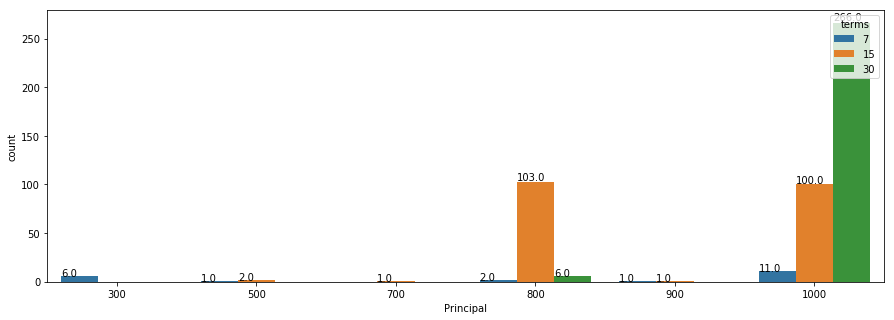

In [397]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(df['Principal'],hue=df['terms'],data=df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()*1.01))

> Most of the loans are 800 or 1000, with hardly any 900 loan which is odd. 
> 800 are almost exclusively termed for biweekly while the $1000 are split 1:2.5 in ratio of biweekly/monthly terms.

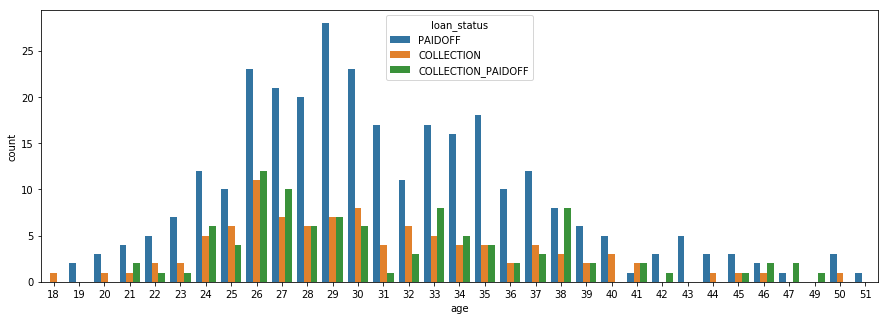

In [312]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(df['age'],hue=df['loan_status'],data=df)

> The loans in collections almost mimic the trend of loan seeking, thus correlation seems is based on demand for the loan.

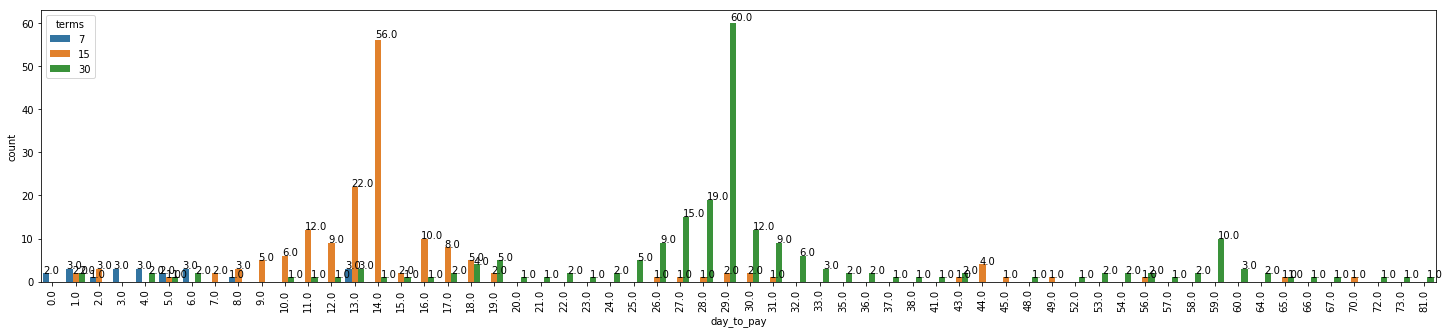

In [246]:
df['day_to_pay'] = (pd.DatetimeIndex(df['paid_off_time']).normalize() - pd.DatetimeIndex(df['effective_date']).normalize())/ np.timedelta64(1, 'D')

fig = plt.figure(figsize=(25, 5))
ax = sns.countplot(x='day_to_pay', hue='terms', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()*1.01))

> Spikes seen on 14 and 29 day, as the repayment is for biweekly and monthly loans.

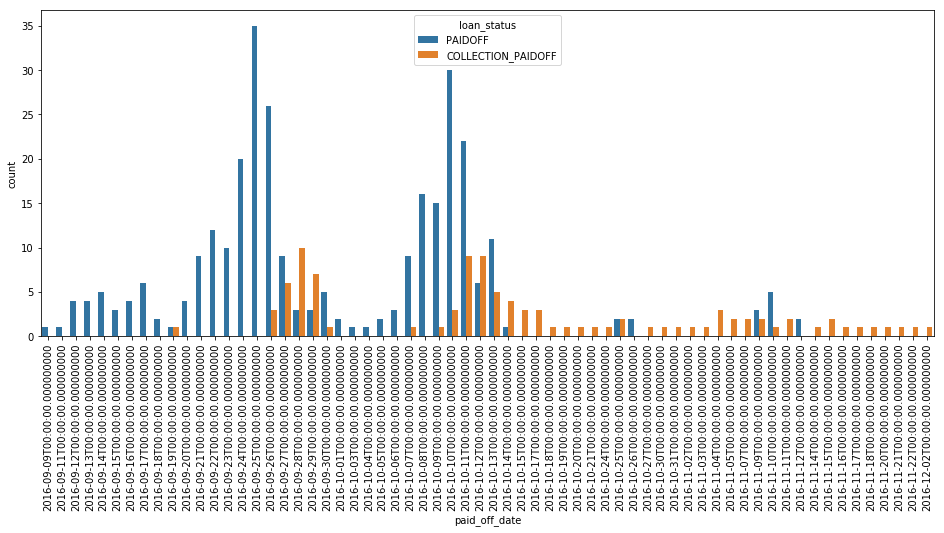

In [391]:
df['paid_off_date'] = pd.DatetimeIndex(df['paid_off_time']).normalize()
fig = plt.figure(figsize=(16, 6))
ax = sns.countplot(x='paid_off_date', data=df.loc[df['loan_status'].isin(['COLLECTION_PAIDOFF', 'PAIDOFF'])] , hue='loan_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

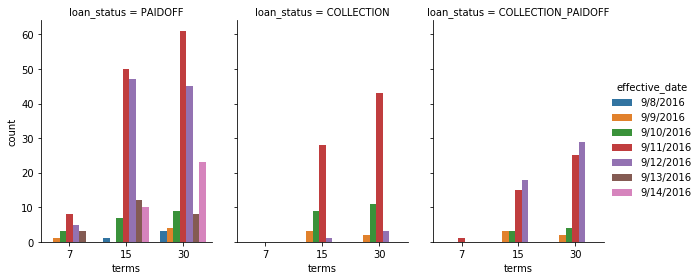

In [293]:
g = sns.catplot(x="terms", hue="effective_date", col="loan_status",data=df, kind="count",height=4, aspect=.7)

> Majority of loans seem to be paid of on time, the ones who paid after moving to collections also is a bit confusing as the graphs are identical with the Paid of loans. The loans with 7 days credit period are the paid off without any adverse behavior.